In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)

logreg.score(X_test, y_test)

0.88

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

cross_val_score(logreg, iris.data, iris.target)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [4]:
cross_val_score(logreg, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [5]:
cross_val_score(logreg, iris.data, iris.target).mean()

0.9733333333333334

In [6]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.06005096, 0.08988285, 0.09075785, 0.05993867, 0.06685591]),
 'score_time': array([0.00099826, 0.        , 0.        , 0.00099754, 0.00099468]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [7]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.060051,0.000998,0.966667,0.966667
1,0.089883,0.000000,1.000000,0.966667
2,0.090758,0.000000,0.933333,0.983333
3,0.059939,0.000998,0.966667,0.983333
4,0.066856,0.000995,1.000000,0.975000


In [8]:
res_df.mean()

fit_time       0.073497
score_time     0.000598
test_score     0.973333
train_score    0.975000
dtype: float64

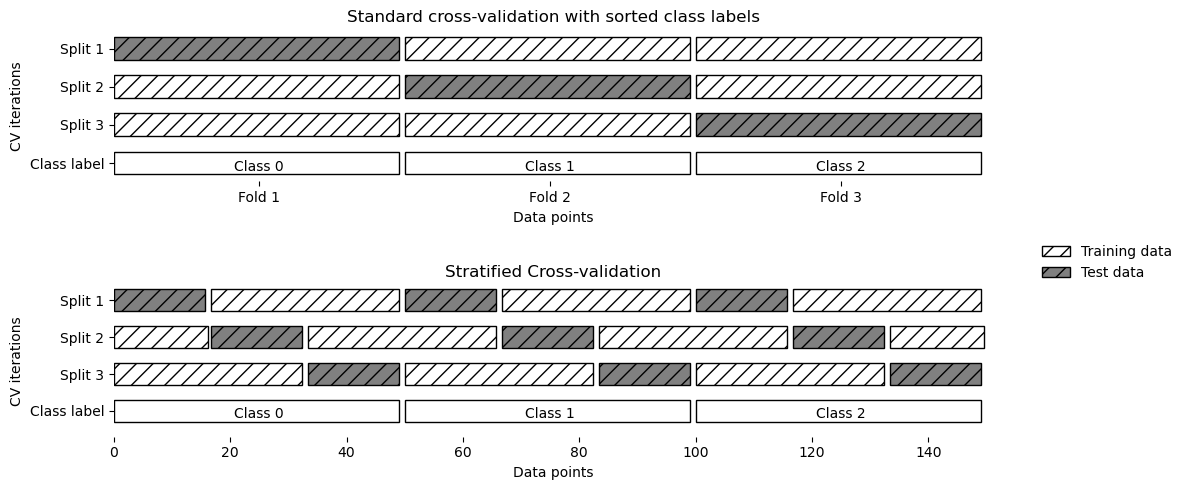

In [9]:
mglearn.plots.plot_stratified_cross_validation()

In [10]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [11]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [12]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.96])

In [14]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

len(scores), scores.mean()

(150, 0.9666666666666667)

In [15]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

scores

array([0.97333333, 0.97333333, 0.97333333, 0.92      , 0.97333333,
       0.93333333, 0.94666667, 0.94666667, 0.96      , 0.96      ])

In [16]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))

scores

array([0.75      , 0.6       , 0.66666667])

In [17]:
from sklearn.model_selection import StratifiedKFold

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

scores, scores.mean()

(array([1.        , 0.96666667, 0.93333333, 1.        , 0.93333333,
        0.96666667, 0.96666667, 0.93333333, 1.        , 0.96666667,
        0.93333333, 1.        , 1.        , 0.96666667, 0.96666667,
        0.9       , 1.        , 1.        , 0.93333333, 0.96666667,
        0.93333333, 0.96666667, 0.96666667, 1.        , 0.96666667,
        1.        , 0.96666667, 0.96666667, 0.9       , 1.        ,
        0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
        0.96666667, 0.96666667, 1.        , 1.        , 0.9       ,
        0.96666667, 1.        , 0.9       , 0.96666667, 0.96666667,
        0.9       , 0.96666667, 0.96666667, 1.        , 0.96666667]),
 0.9646666666666667)

In [19]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train.shape[0], X_test.shape[0]

(112, 38)

In [20]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


In [21]:
best_score

0.9736842105263158

In [22]:
best_parameters

{'C': 100, 'gamma': 0.001}

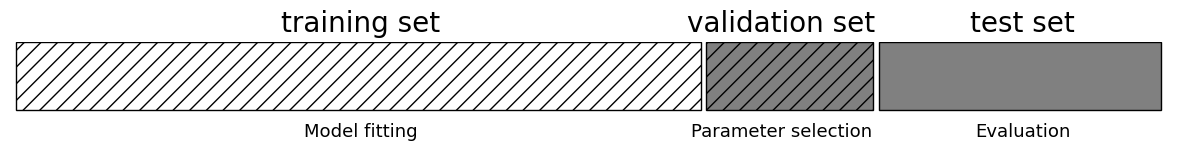

In [23]:
mglearn.plots.plot_threefold_split()

In [24]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

X_train.shape[0], X_valid.shape[0], X_test.shape[0]

(84, 28, 38)

In [25]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_valid, y_valid)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


In [26]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)

In [27]:
best_score, best_parameters

(0.9642857142857143, {'C': 10, 'gamma': 0.001})

In [28]:
test_score

0.9210526315789473

In [29]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

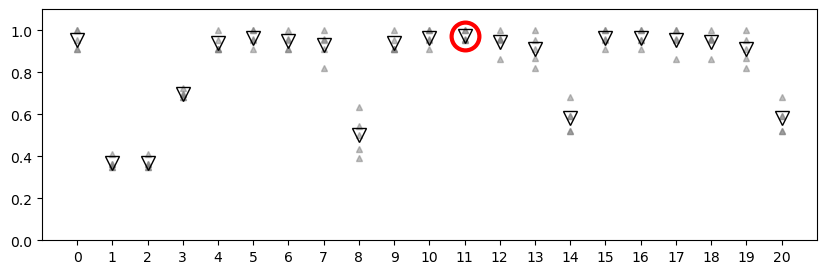

In [31]:
mglearn.plots.plot_cross_val_selection()

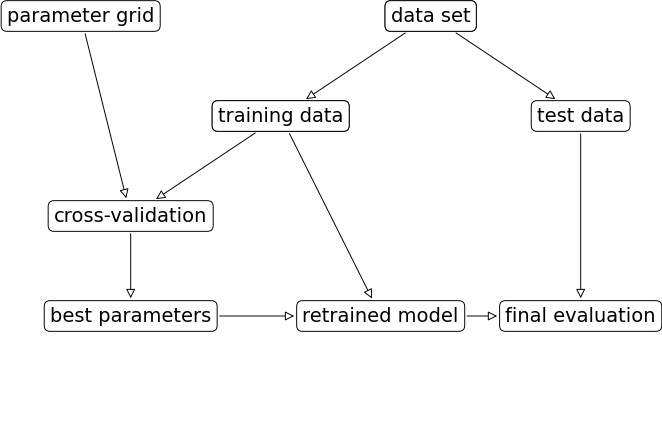

In [33]:
mglearn.plots.plot_grid_search_overview()

In [34]:
param_grid = {
    'C': [10**x for x in range(-3, 3)],
    'gamma': [10**x for x in range(-3, 3)]
}

param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [35]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [37]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [38]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [39]:
grid_search.best_score_

0.9731225296442687

In [40]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [41]:
pd.set_option('display.max_columns', None)

results = pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.002573,0.004283,0.00358,0.002991,0.003169
std_fit_time,0.000473,0.00083,0.000487,0.000631,0.000814
mean_score_time,0.002108,0.001895,0.001946,0.002394,0.002148
std_score_time,0.001249,0.000979,0.000751,0.001017,0.000723
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


In [42]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.002573,0.004283,0.00358,0.002991,0.003169,0.004001,0.002992,0.002793,0.003155,0.002529,0.002691,0.004031,0.003191,0.002592,0.002418,0.00239,0.002961,0.003998,0.002798,0.003591,0.001776,0.001414,0.00339,0.003989,0.002108,0.001394,0.00159,0.001904,0.003029,0.003715,0.001396,0.001873,0.001627,0.001987,0.003306,0.004246
std_fit_time,0.000473,0.00083,0.000487,0.000631,0.000814,0.000688,0.000631,0.001323,0.001507,0.000451,0.000975,0.001058,0.001465,0.000488,0.001033,0.000825,0.000062,0.000646,0.000445,0.001353,0.001179,0.000475,0.001017,0.001411,0.000228,0.000494,0.000484,0.000147,0.000049,0.001446,0.000489,0.001157,0.000518,0.000619,0.000407,0.000718
mean_score_time,0.002108,0.001895,0.001946,0.002394,0.002148,0.002194,0.001196,0.002638,0.002251,0.001666,0.002111,0.001754,0.001509,0.000999,0.001635,0.001214,0.001332,0.002011,0.001453,0.001396,0.000783,0.001038,0.001211,0.002993,0.001077,0.001581,0.000798,0.000987,0.000995,0.0018,0.000798,0.001096,0.000566,0.001893,0.001787,0.001924
std_score_time,0.001249,0.000979,0.000751,0.001017,0.000723,0.000747,0.000399,0.001299,0.00127,0.000672,0.001046,0.000793,0.000773,0.000002,0.000699,0.000392,0.0004,0.000895,0.000635,0.000489,0.000743,0.000132,0.000393,0.002093,0.00016,0.001747,0.000399,0.000615,0.000098,0.001173,0.000399,0.000197,0.000466,0.001688,0.000396,0.000647
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}","{'C': 0.01, 'gamma': 10}","{'C': 0.01, 'gamma': 100}","{'C': 0.1, 'gamma': 0.001}","{'C': 0.1, 'gamma': 0.01}","{'C': 0.1, 'gamma': 0.1}","{'C': 0.1, 'gamma': 1}","{'C': 0.1, 'gamma': 10}","{'C': 0.1, 'gamma': 100}","{'C': 1, 'gamma': 0.001}","{'C': 1, 'gamma': 0.01}","{'C': 1, 'gamma': 0.1}","{'C': 1, 'gamma': 1}","{'C': 1, 'gamma': 10}","{'C': 1, 'gamma': 100}","{'C': 10, 'gamma': 0.001}","{'C': 10, 'gamma': 0.01}","{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,1.0,0.347826,0.347826,0.695652,0.913043,1.0,0.956522,0.913043,0.391304,0.913043,1.0,1.0,0.956522,0.869565,0.521739,1.0,1.0,1.0,0.956522,0.869565,0.521739
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,0.913043,0.347826,0.347826,0.695652,0.913043,0.956522,0.913043,0.956522,0.434783,0.913043,0.956522,0.956522,0.956522,0.913043,0.521739,0.956522,0.913043,0.956522,0.956522,0.913043,0.521739
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.681818,0.909091,1.0,0.363636,0.363636,0.681818,1.0,1.0,1.0,1.0,0.545455,1.0,1.0,1.0,1.0,1.0,0.590909,1.0,1.0,1.0,1.0,1.0,0.590909


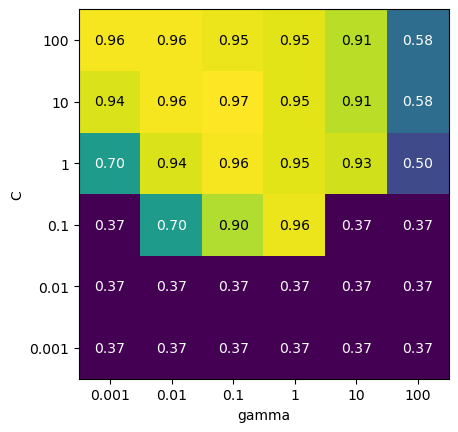

In [43]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(
    scores,
    xlabel='gamma', xticklabels=param_grid['gamma'], 
    ylabel='C', yticklabels=param_grid['C'],
    cmap='viridis'
)

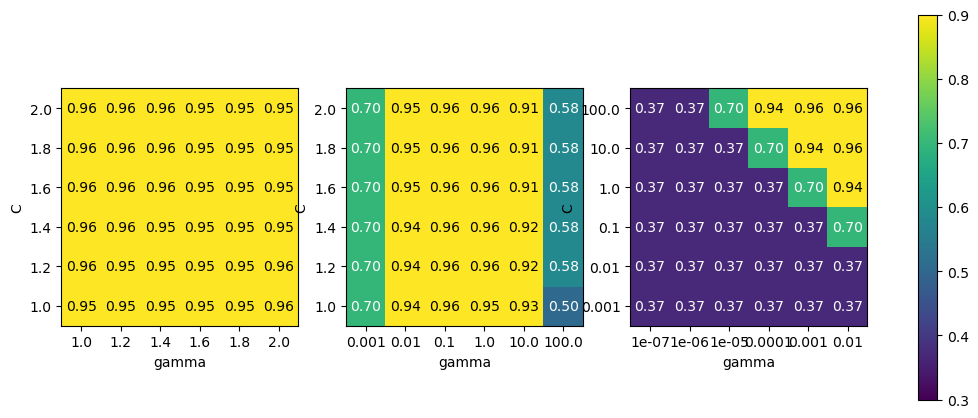

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.linspace(1, 2, 6)
}

param_grid_one_log = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.logspace(-3, 2, 6)
}

param_grid_range = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-7, -2, 6)
}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(
        scores,
        xlabel='gamma', xticklabels=param_grid['gamma'], 
        ylabel='C', yticklabels=param_grid['C'],
        cmap='viridis', ax=ax, vmin=0.3, vmax=0.9
    )

plt.colorbar(scores_image, ax=axes.tolist())

In [45]:
param_grid = [
    {
        'kernel': ['rbf'],
        'C': [10**x for x in range(-3, 3)],
        'gamma': [10**x for x in range(-3, 3)]
    },
    {
        'kernel': ['linear'],
        'C': [10**x for x in range(-3, 3)]
    }
]

param_grid

[{'kernel': ['rbf'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [46]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_, grid_search.best_score_

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9731225296442687)

In [47]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.002554,0.003119,0.003092,0.002193,0.002342,0.002972,0.002401,0.001891,0.002227,0.003192,0.002436,0.002972,0.002619,0.003129,0.003246,0.002593,0.003263,0.004047,0.0034,0.001993,0.0013,0.001997,0.003039,0.003229,0.001909,0.00164,0.001749,0.001993,0.004164,0.004169,0.001162,0.0022,0.002205,0.002026,0.004471,0.003193,0.002987,0.001765,0.0026,0.001969,0.001793,0.002194
std_fit_time,0.000458,0.000772,0.00081,0.000399,0.000371,0.000086,0.000481,0.000662,0.000736,0.000747,0.000833,0.000879,0.000894,0.001958,0.001227,0.001197,0.001893,0.001214,0.000804,0.001077,0.0006,0.001097,0.000624,0.000294,0.001111,0.000935,0.000378,0.000615,0.00189,0.001937,0.000421,0.00147,0.001453,0.001208,0.001706,0.000402,0.001258,0.000419,0.001736,0.00063,0.000746,0.001934
mean_score_time,0.001795,0.0015,0.001618,0.001396,0.001197,0.001198,0.001455,0.000882,0.000964,0.001396,0.000955,0.001698,0.001508,0.001183,0.00214,0.002189,0.001197,0.003123,0.00161,0.001194,0.000598,0.002067,0.000964,0.001323,0.000998,0.001053,0.000413,0.001995,0.001799,0.001233,0.001601,0.000814,0.00097,0.001129,0.001314,0.002214,0.000614,0.000686,0.000792,0.000598,0.001596,0.001396
std_score_time,0.000746,0.000779,0.000508,0.000487,0.0004,0.000348,0.000522,0.000485,0.000058,0.00049,0.000085,0.000492,0.00041,0.000407,0.001449,0.00192,0.000398,0.001989,0.0005,0.000395,0.000489,0.001689,0.000074,0.000633,0.000002,0.00058,0.000506,0.001979,0.001549,0.000387,0.00172,0.000408,0.000637,0.000854,0.000408,0.001972,0.000503,0.000566,0.000396,0.000489,0.00174,0.001353
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"

In [48]:
param_grid = {
    'C': [10**x for x in range(-3, 3)],
    'gamma': [10**x for x in range(-3, 3)]
}

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)

scores, scores.mean()

(array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 0.9800000000000001)

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

param_dist = [
    {
        'kernel': ['rbf'],
        'C': loguniform(0.001, 100),
        'gamma': loguniform(0.001, 100)
    },
    {
        'kernel': ['linear'],
        'C': loguniform(0.001, 100)
    }
]

In [50]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20, random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000018AC12FC280>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000018AC12FC670>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000018AC12FCFA0>,
                                         'kernel': ['linear']}],
                   random_state=42)

In [51]:
rand_search.best_params_, rand_search.best_score_

({'C': 1.7965626423790642, 'kernel': 'linear'}, 0.9731225296442687)

In [52]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [
    {
        'kernel': ['rbf'],
        'C': [10**x for x in range(-3, 3)],
        'gamma': [10**x for x in range(-3, 3)]
    },
    {
        'kernel': ['linear'],
        'C': [10**x for x in range(-3, 3)]
    }
]

halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose=1, random_state=42, n_jobs=-1)
halv_search.fit(X_train, y_train)

halv_search.best_params_, halv_search.best_score_

n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 30
max_resources_: 112
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 30
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits


({'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, 0.9653594771241831)

In [53]:
halv_search.n_candidates_, halv_search.n_resources_

([42, 14], [30, 90])

In [54]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [55]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

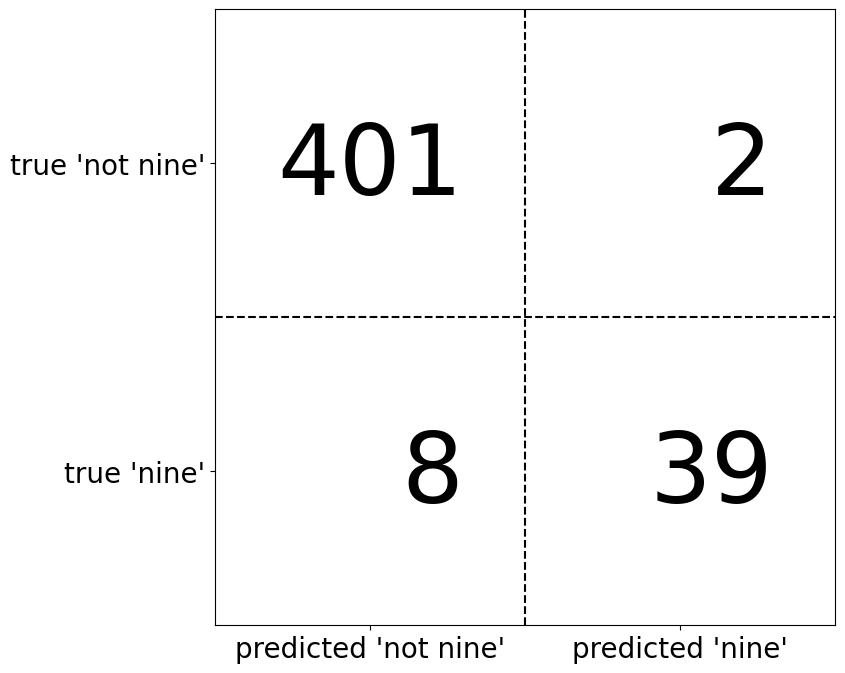

In [57]:
mglearn.plots.plot_confusion_matrix_illustration()

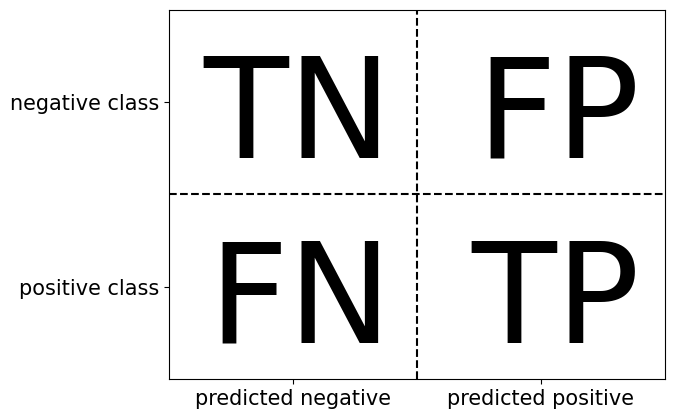

In [58]:
mglearn.plots.plot_binary_confusion_matrix()

In [59]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [60]:
confusion_matrix(y_test, pred_most_frequent)

array([[403,   0],
       [ 47,   0]], dtype=int64)

In [61]:
confusion_matrix(y_test, pred_dummy)

array([[355,  48],
       [ 45,   2]], dtype=int64)

In [62]:
confusion_matrix(y_test, pred_tree)

array([[390,  13],
       [ 24,  23]], dtype=int64)

In [63]:
confusion_matrix(y_test, pred_logreg)

array([[402,   1],
       [  6,  41]], dtype=int64)

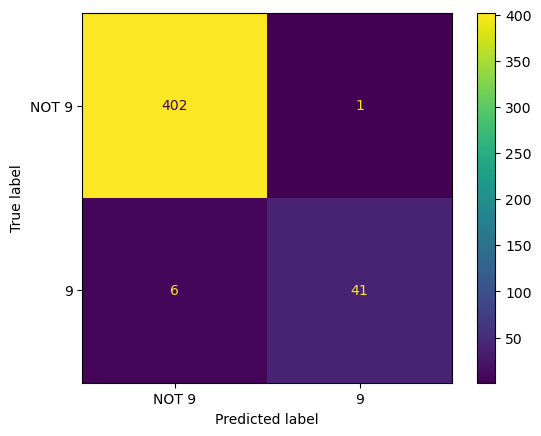

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['NOT 9', '9'])

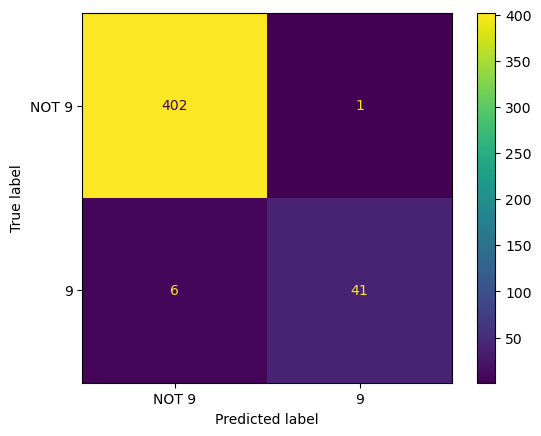

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels=['NOT 9', 9])

plt.show()

정밀도: $TP \over TP + FP$ <br>
재현율: $TP \over TP + FN$  ( aka 민감도, 적중률, 진짜 양성 비율 (TPR) )<br>
정밀도와 재현율은 트레이드 오프 관계 <br>
&nbsp; 이유<br>
- 만약에 재현율을 높이겠다고 전부 Positive로 분류했다고 하면
- 그 중 대부분은 FP로 분류될 것
- 결국 재현율은 ~1이 되겠지만 정밀도는 ~0이 될 것
- 그 반대도 마찬가지

F1 점수 <br>
<br>
정밀도, 재현율의 조화 평균<br>
식: $F1=2*{(정밀도*재현율) \over (정밀도+재현율)}$
<br><br>
F점수의 일반화된 가중치 조화 평균 (P: 정밀도, R: 재현율) <br>
$
\begin {matrix} 
F
    &=& {1 \over \alpha {1 \over P } + (1-\alpha) {1 \over P} } \\
    &=& { { \beta^{2}+1 }PR } \over {\beta^{2}P+R}
\end {matrix}
$<br>
(여기서 $\beta^{2} = { {1-\alpha} \over {\alpha} }$) <br>
$f_1$은 $\beta=1$일 때 (즉 정밀도와 재현율의 가중치가 $\alpha=0.5$로 동일할 때 점수이다 <br>
$\beta > 1$이면 재현율이 강조되고, $\beta < 1$이면 정밀도과 강조된다

In [66]:
""" 각 모델 별 f1 score """

from sklearn.metrics import f1_score

print(
    "빈도 기반 dummy model: {:.2f}".format(f1_score(y_test, pred_most_frequent)),
    "무작위 dummy model: {:.2f}".format(f1_score(y_test, pred_dummy)),
    "트리 model: {:.2f}".format(f1_score(y_test, pred_tree)),
    "logistic model: {:.2f}".format(f1_score(y_test, pred_logreg)),
    sep='\n'
)

빈도 기반 dummy model: 0.00
무작위 dummy model: 0.04
트리 model: 0.55
logistic model: 0.92


F1 점수의 한계: 어떤 모델이 좋아보이는지 잘 알 수는 있어도 그 의미를 해석하기 어렵다

In [68]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    pred_most_frequent,
    target_names=['NOT 9', '9'],
    zero_division=0
))

              precision    recall  f1-score   support

       NOT 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [69]:
print(
    classification_report(
        y_test,
        pred_logreg,
        target_names=['NOT 9', '9'],
        zero_division=0
    )
)

              precision    recall  f1-score   support

       NOT 9       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [72]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

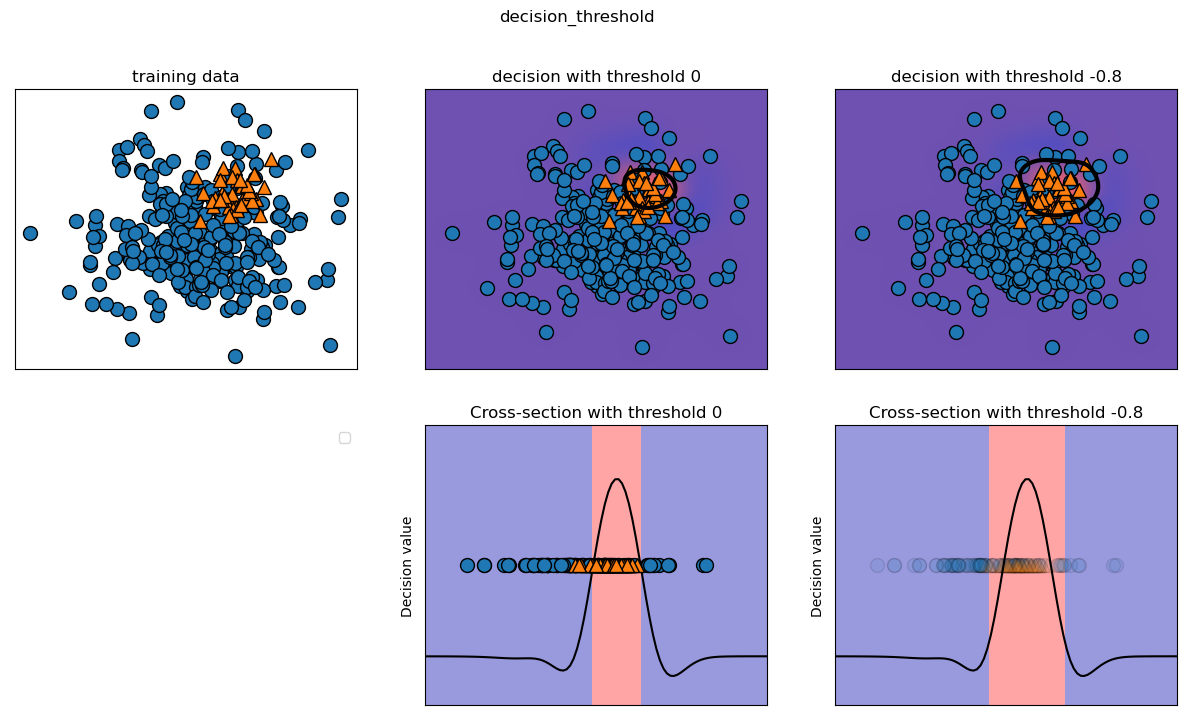

In [73]:
mglearn.plots.plot_decision_threshold()

In [74]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [75]:
y_pred_lower_threshold = svc.decision_function(X_test) > (-0.8)

In [79]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [80]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

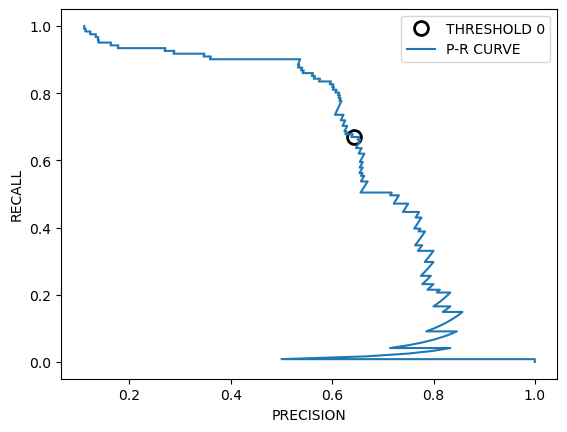

In [83]:
"""
    본 예시에선 테스트셋을 그대로 썼지만
    실전에선 교차 검증 훈련셋을 사용해 훈련한 뒤 검증셋을 사용해 테스트 해야 한다
"""

X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=0.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)

""" 임계값 표시: 정확히 0이 아닐 수 있으므로 다음과 같이 산출 """
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='THRESHOLD 0', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='P-R CURVE')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.legend()

plt.show()

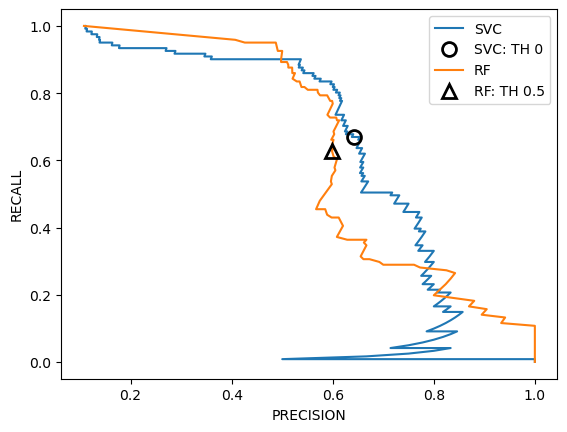

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[ : , 1])

plt.plot(precision, recall, label='SVC')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='SVC: TH 0', fillstyle='none', c='k', mew=2)

close_defalult_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf, recall_rf, label='RF')
plt.plot(
    precision_rf[close_defalult_rf], recall_rf[close_defalult_rf], '^', c='k', markersize=10, label='RF: TH 0.5', fillstyle='none', mew=2
)

plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.legend()

plt.show()